# PRACTICA PROFESIONALIZANTE I

## Proyecto: Análisis integral de salud y condición física

### Docentes: 
* Pérez, Narciso
* Prado, Héctor
* Charletti, Carlos

### Alumnos:
* Ingaramo, Ma. Eugenia - Sala 1
* Lonardi, Pablo - Sala  1
* Margheim, Carolina - Sala 2
* Ontiveros, Manuel -  Sala 1
* Sosa, Rodrigo - Sala 2
* Zenere, Mauricio - Sala 2

### Sobre Nosotros:
Somos una innovadora startup dedicada a resolver desafíos complejos de diferentes empresas u organizaciones utilizando para tal fin diferentes herramientas de ciencia de datos. Utilizamos diferentes herramientas de analisis, exploración, visualizacion y predicción de datos.

### Situación:

Un consorcio formado por reconocidos médicos especializados en medicina deportiva, entrenadores personales y nutricionistas de élite nos ha contratado para abordar una problemática crítica Observan una creciente interconexión entre el rendimiento físico y la salud de los deportistas, pero carecen de una herramienta precisa que les permita prever y optimizar ambos aspectos en sus atletas.

### Hipótesis:

Nuestra hipótesis central es que existen correlaciones significativas entre las entre variables clave, como el peso corporal, la cantidad de abdominales y el índice de grasa corporal, y su impacto en la categoría de estado físico de una persona. Consideramos que ante cambios en estas variables, se verán reflejados cambio en la categorización de las personas. 
Esperamos que este proyecto proporcione insights valiosos sobre cómo los cambios en el peso corporal, la cantidad de abdominales y el índice de grasa corporal pueden influir en la categorización del estado físico. Si nuestras hipótesis se confirman, esto podría tener un impacto significativo en la promoción de la salud y el diseño de programas de acondicionamiento físico personalizados.

### Solución propuesta:

Nuestro objetivo es desarrollar una plataforma innovadora que integre datos clave sobre la salud y el rendimiento físico. Esta plataforma proporcionará predicciones precisas y recomendaciones fundamentadas en datos. Buscamos empoderar a los profesionales del deporte para que tomen decisiones informadas que impulsen el rendimiento y mejoren la salud de los deportistas. Esta colaboración representa un desafío apasionante donde combinaremos nuestro expertise en ciencia de datos con el conocimiento experto de los médicos y entrenadores. Juntos, vamos a revolucionar la forma en que se abordan la salud y el rendimiento en el ámbito deportivo, marcando un hito significativo en la industria.

### Trabajo en el Notebook:
* **Análisis Exploratorio de Datos (EDA):**

Realizaremos un análisis exploratorio de datos exhaustivo. Exploraremos cómo la edad, el género, la altura, el peso y otros factores influyen en el rendimiento físico y la salud de las personas. Este análisis nos ayudará a comprender las relaciones clave entre las variables y nos guiará en la construcción de modelos precisos.

* **Modelado de Machine Learning:**
Utilizaremos técnicas de aprendizaje automático para crear un modelo de predicción. Entrenaremos el modelo con el conjunto de datos y evaluaremos su rendimiento. Nuestro objetivo es lograr un modelo que prediga el rendimiento físico y la salud con alta precisión.

### Trabajo en Streamlit:
* **Desarrollo de la Aplicación Web:**
Construiremos una aplicación web interactiva utilizando Streamlit. Esta aplicación permitirá a los profesionales de la salud y los deportistas ingresar información sobre sus pacientes, como edad, género, altura, peso, entre otros. Basándonos en los datos ingresados, nuestro modelo proporcionará predicciones sobre el rendimiento físico y la salud (Devuelve una clasificación de A-D: Optimo-Malo).

* **Facilitando Decisiones Informadas:**
La aplicación proporcionará información y recomendaciones fundamentadas en datos. Esto permitirá a los usuarios tomar decisiones informadas sobre la mejora de la salud y el rendimiento físico de sus pacientes o de ellos mismos. Además, podrán evaluar estrategias para optimizar el rendimiento físico basadas en los resultados de nuestro modelo.

### Modelado:

Una vez obtenido el acceso a la base, se volcó el contenido de la misma a un archivo .csv. El consorcio nos brindó una descripción de las variables presentes en el mismo, como así también el dominio o rango esperado de sus variables numéricas, en caso de que haya algún tipo de error en la base de datos. En una primera etapa se le prestará especial atención a aquellas variables que contengan valores considerados absurdos e imposibles para el ser humano.

### Descripción  de variables:

Contexto: El dataset contiene 13.393 registros que ilustran el grado de rendimiento con la edad y algunos datos de performance en el ejercicio distribuidos en las siguientes 12 columnas.

* age (Edad = años): 20 - 64
* gender (Género = Masculino/Femenino): F,M
* height_cm (Altura en centímetros): cm
* weight_kg (Peso en kilogramos)
* body fat_% (Porcentaje de grasa corporal)
* diastolic (Presión arterial diastólica - min)
* systolic (Presión arterial sistólica - min)
* gripForce (Fuerza de agarre)
* sit and bend forward_cm (Sentarse e inclinarse hacia adelante): cm
* sit-ups counts (Cantidad de abdominales)
* broad jump_cm (Salto largo): cm
* class : A,B,C,D ( A: Mejor - D: Peor) / Variable categórica ordinal

### 1-  Dependencies:

In [1]:
### Importar librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from IPython.display import Image, display

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



### 2-  Data Acquisition:

In [2]:
# Importar dataset  desde github (raw):
url="https://raw.githubusercontent.com/CaroMargh/Grupo1-PP1/main/data/bodyPerformance.csv"
# Leer dataset:
df = pd.read_csv(url)
# Mostrar dataset:
display(df)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


### 3-  Data Understanding:

In [3]:
# Descripción del dataset:

def description (data: pd.DataFrame):
    print(f"Shape: \n{data.shape}\n")
    print(f"Dimension: \n{data.ndim}\n")
    print(f"Data types: \n{data.dtypes}\n")
    print(f"Data information: \n{data.info()}\n")
    print(f"Data description: \n{data.describe()}\n")
    print(f"Total de valores nulos: \n{data.isnull().sum()}\n")
    print(f"Total de valores duplicados: \n{data.duplicated().sum()}\n")

description(df)

Shape: 
(13393, 12)

Dimension: 
2

Data types: 
age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic               

#### Observaciones:

* Se podrían realizar la conversión de altura de cm a m.
* La columna de genero y la de clase se convertirán a formato de datos categóricos usando get_dummies.
* Sería util pasar las columnas en centímetros a metros para unificar criterios y luego borrar las columnas en cm.
* Es útil cambiar el nombre de las columnas para el entendimiento de todo el equipo que habla español
* Con los valores otorgados se podría calcular el IMC (Índice de Masa Corporal = Peso[Kg]/(Altura[m])^2)
* No hay valores nulos en el dataframe, se ha encontrado un registro duplicado que deberá eliminarse.
* Para verificar los outliers utilizaremos el método gráfico de la librería matplotlib.

### 4-  Data Preparation:

Para esta tapa, primero hacemos una copia del dataset que ajustaremos a nuestras necesidades segun las observaciones mencionadas anteriormente.

In [4]:
#Copia del dataset:
df_copy = df.copy()

In [5]:
#Eliminar valor duplicado:

#Creo una variable que me indique si hay valores duplicados:
duplicados = df_copy.duplicated()
#Muestro los valores duplicados:
fila_duplicada = df_copy[duplicados]
print("Fila duplicada:")
print(fila_duplicada)
#Elimino los valores duplicados:
df_copy.drop_duplicates(inplace=True)
#Verifico que se hayan eliminado los valores duplicados:
print(f"Total de valores duplicados: \n{df_copy.duplicated().sum()}\n")

Fila duplicada:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12473  27.0      F      157.0       49.1        30.7       70.0      86.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
12473       27.7                     19.7            51.0          167.0     A  
Total de valores duplicados: 
0



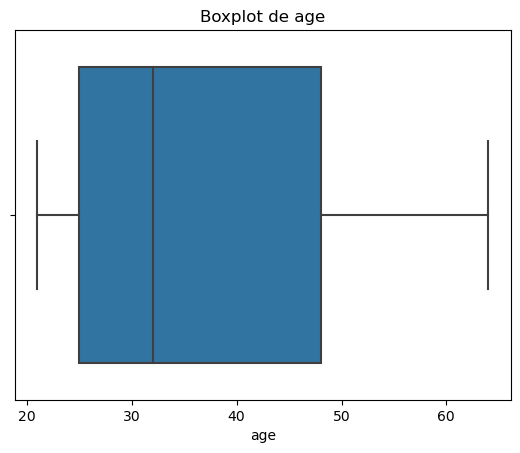

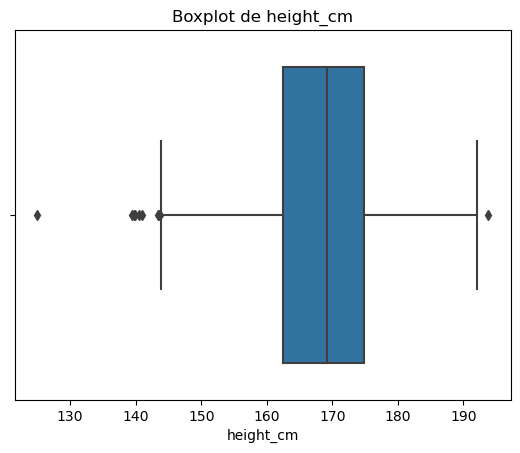

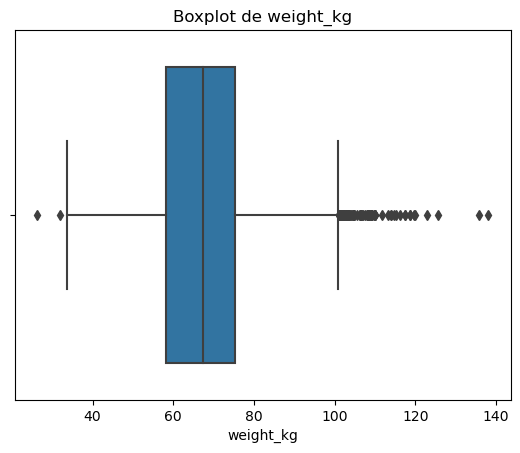

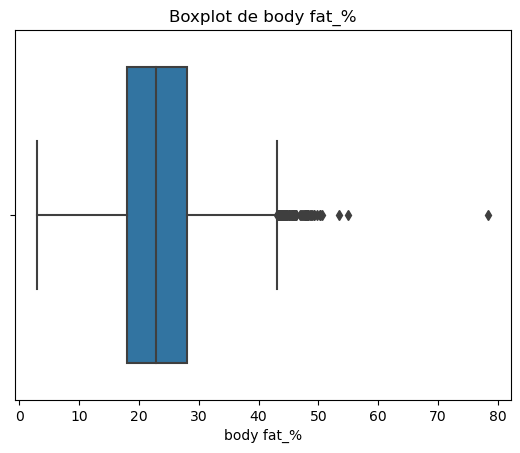

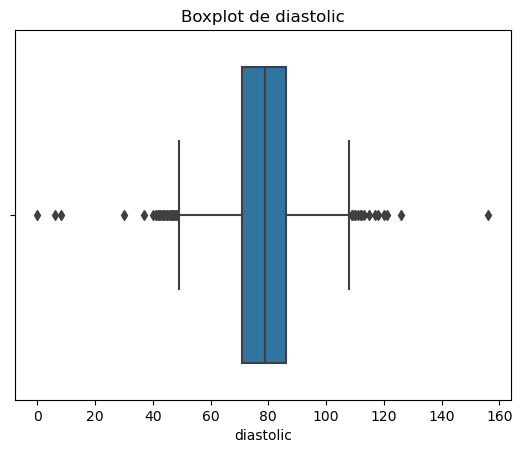

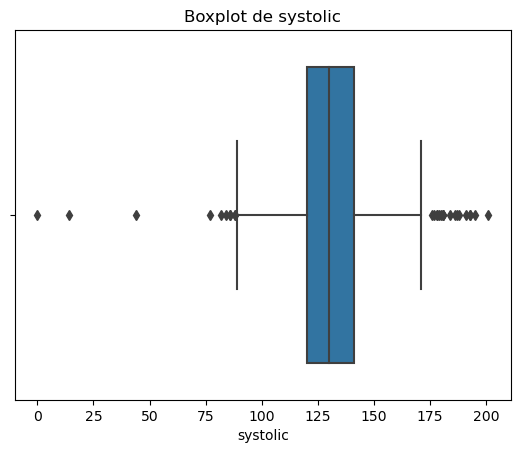

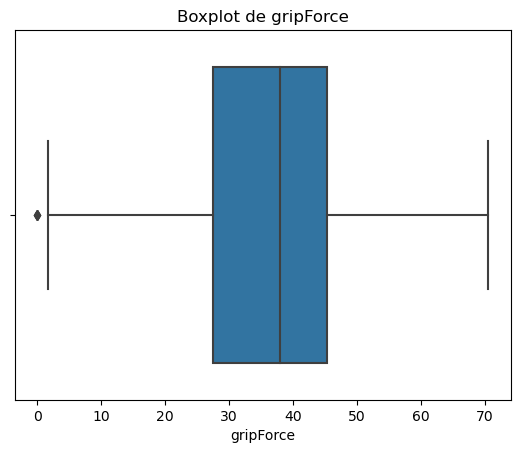

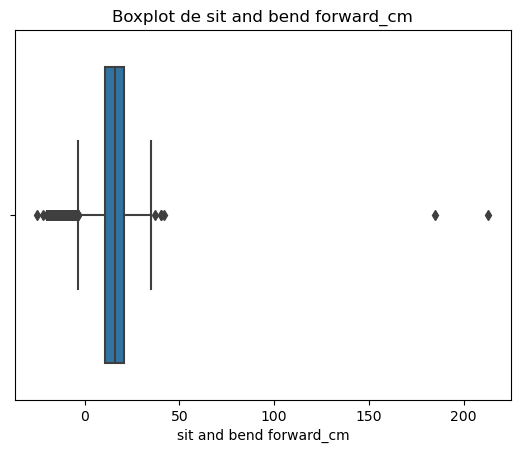

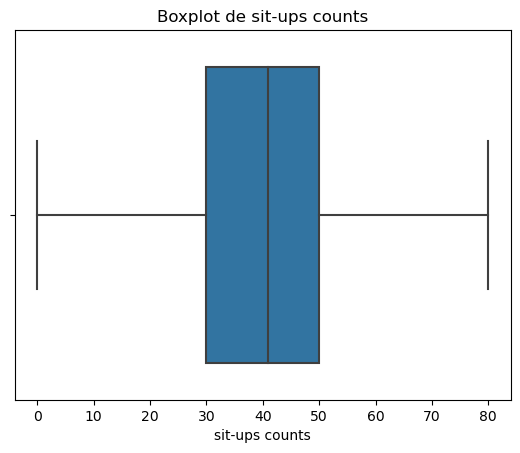

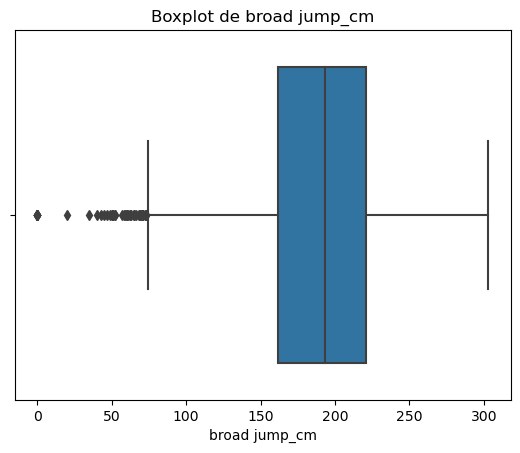

Registros con outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
58     42.0      M      174.1     103.10    30.50000       78.0     123.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
136    61.0      F      153.2      62.20    37.00000       71.0     111.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [6]:
# Identificación de outliers:

numericas = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for column in numericas:
    sns.boxplot(x=df_copy[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df_copy[numericas].quantile(0.25)
Q3 = df_copy[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df_copy[numericas] < (Q1 - 1.5 * IQR)) | (df_copy[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df_copy[outliers]
print("Registros con outliers:")
print(outlier_rows)

### Borrado de Outliers
Teniendo en cuenta que los Outliers representan una porción pequeña de los datos pero con varianzas muy significativas para el proyecto, se proceder al borrado de los mismos. Son 736 de un total de 13393.

In [7]:
# Eliminar las filas que contienen outliers
df = df_copy[~outliers]

# Mostrar el DataFrame limpio
print("DataFrame sin outliers:")
print(df)

DataFrame sin outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [8]:
# Conversión cm a m.
#Conversion y renombrado de la altura (height_cm):
df_copy["alto_m"] = df_copy["height_cm"]/100
#Conversion y renombrado de columna Sentarse e inclinarse hacia adelante (sit and bend forward_cm):
df_copy["sentarse_inclinarse_m"] = df_copy["sit and bend forward_cm"]/100
#Conversion y renombrado de columna salto en largo (broad jump_cm):
df_copy["salto_largo_m_"] = df_copy["broad jump_cm"]/100

#Eliminar columnas en cm.
df_copy.drop(["height_cm","sit and bend forward_cm","broad jump_cm"], axis=1, inplace=True)

# Calcula el IMC:
df_copy['IMC'] = df_copy['weight_kg'] / (df_copy['alto_m'] ** 2)

#Renombrar las columnas:
df_copy.rename(columns={"age": "edad", "gender": "genero", "weight_kg": "peso_kg","body fat_%": "grasa_corporal_%","diastolic": "diastolica","systolic": "sistolica","gripForce": "fuerza_agarre",
"sit-ups counts": "cant_abdominales","class": "clase"}, inplace=True)

df_copy.head(100)

,edad,genero,peso_kg,grasa_corporal_%,diastolica,sistolica,fuerza_agarre,cant_abdominales,clase,alto_m,sentarse_inclinarse_m,salto_largo_m_,IMC
0,27.0,M,75.24,21.3,80.0,130.0,54.9,60.0,C,1.723,0.184,2.17,25.344179
1,25.0,M,55.80,15.7,77.0,126.0,36.4,53.0,A,1.650,0.163,2.29,20.495868
2,31.0,M,78.00,20.1,92.0,152.0,44.8,49.0,C,1.796,0.120,1.81,24.181428
3,32.0,M,71.10,18.4,76.0,147.0,41.4,53.0,B,1.745,0.152,2.19,23.349562
4,28.0,M,67.70,17.1,70.0,127.0,43.5,45.0,B,1.738,0.271,2.17,22.412439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.0,M,65.70,21.5,90.0,151.0,49.6,54.0,A,1.667,0.187,2.42,23.642542
96,50.0,F,57.20,32.0,69.0,134.0,21.1,17.0,C,1.584,0.186,1.36,22.797419
97,22.0,M,72.00,30.4,75.0,115.0,34.6,54.0,C,1.758,0.190,1.88,23.296719
98,56.0,M,70.90,19.5,83.0,135.0,47.9,44.0,B,1.730,0.111,1.62,23.689398


* Insight: Observamos que los datos de grasa corporal y el calculo del IMC son diferentes. 

In [9]:
df_copy.describe(include= "object").T

,count,unique,top,freq
genero,13392,2,M,8467
clase,13392,4,C,3349


Preparamos los datos de las 12 columnas para realizar la predicción de la clase a la que pertenece un paciente (Variable dependiente o target: "clase") en base los datos ingresados. De las variables independientes (11 columnas restantes) podemos decir que solo una (genero), es una variable categórica. Procederemos a convertirla en una variable numérica donde M:1, F. Misma situación con la variable independiente (A:1, B:2, C:3 y D:4)

* Insight: Observamos que la cantidad de masculinos en el dataset es casi el doble de la población femenina.
* Insight: La cantidad de pacientes clase A es la misma que B, y la cantidad de pacientes tipo C es la misma que D.

In [10]:
#Binarizado de la columna genero: Utilizamos get_dummies para crear una columna por cada valor de la columna genero. (La columna genero se elimina y se crea genero_M donde M:1 / F:0)

df_copy = pd.get_dummies(df_copy, columns=['genero'], drop_first=True)
# renombramos la columna genero_M a genero:
df_copy.rename(columns={"genero_M":'genero'},inplace=True)
conteo_genero = df_copy['genero'].value_counts()

# Mostrar los conteos de las columnas genero y clase:
print('Cantidad de 0 y 1 en la columna género:')
print(conteo_genero)




Cantidad de 0 y 1 en la columna género:
1    8467
0    4925
Name: genero, dtype: int64


In [11]:
# Asignamos valores numéricos a las clases: Usamos la función labelEncoder para mapear los valores categóricos de "clase" a valores numericos.

# Mapeo de valores de la columna clase:
# A:0,
# B:1,
# C:2,
# D:3

encode =LabelEncoder()
df_copy["clase_encode"] = encode.fit_transform(df_copy["clase"])
# Eliminamos la columna clase:
df_copy.drop(["clase"], axis=1, inplace=True)
# renombramos la columna clase_encode a clase:
df_copy.rename(columns={"clase_encode":'clase'},inplace=True)
conteo_clase = df_copy['clase'].value_counts()
print('Cantidad de 0,1,2,3 en la columna clase:')
print(conteo_clase)

Cantidad de 0,1,2,3 en la columna clase:
2    3349
3    3349
0    3347
1    3347
Name: clase, dtype: int64


In [12]:
#Reordenamos:
ordenado =[
'edad',
'genero',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
'clase',
]
df_copy = df_copy[ordenado]

# Mostrar dataset:
df_copy.head(100)

,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase
0,27.0,1,1.723,75.24,21.3,25.344179,80.0,130.0,54.9,0.184,60.0,2.17,2
1,25.0,1,1.650,55.80,15.7,20.495868,77.0,126.0,36.4,0.163,53.0,2.29,0
2,31.0,1,1.796,78.00,20.1,24.181428,92.0,152.0,44.8,0.120,49.0,1.81,2
3,32.0,1,1.745,71.10,18.4,23.349562,76.0,147.0,41.4,0.152,53.0,2.19,1
4,28.0,1,1.738,67.70,17.1,22.412439,70.0,127.0,43.5,0.271,45.0,2.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.0,1,1.667,65.70,21.5,23.642542,90.0,151.0,49.6,0.187,54.0,2.42,0
96,50.0,0,1.584,57.20,32.0,22.797419,69.0,134.0,21.1,0.186,17.0,1.36,2
97,22.0,1,1.758,72.00,30.4,23.296719,75.0,115.0,34.6,0.190,54.0,1.88,2
98,56.0,1,1.730,70.90,19.5,23.689398,83.0,135.0,47.9,0.111,44.0,1.62,1


### 5- Data Visualization:

### 6-  Train Model:

Para este problema de clasificación multiclase utilizaremos algoritmos de regresión logística:

#### Escalado de las variables numericas continuas (Estandarización):

In [13]:
# Selecciono las columnas con valores numéricos continuos:
columnas_a_escalar = [
'edad',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
]

# Creo un nuevo dataframe con las columnas a escalar:
df_columnas_escalar = df_copy[columnas_a_escalar]

# Instancio el objeto StandardScaler:
scaler = StandardScaler()

# Escalo las columnas seleccionadas
df_scaled_values = scaler.fit_transform(df_columnas_escalar)

# Crear un nuevo DataFrame escalado
df_scaled = pd.DataFrame(df_scaled_values, columns=columnas_a_escalar)

## ERROR A CORREGIR:

Hay que verificar este error, df_copy y df_scaled no contienen datos nulos. Al momento de volver a agregar las columnas "genero" y "clase" a df_scaled se agregan dos valores nulos en esas columnas. No se por que esta pasando eso. Lo soluciné eliminando las filas con nulos pero no es lo ideal supongo.

In [14]:
# Verifico nulos en 'genero' y 'clase' en df_copy
print('Nulos en genero en df_copy:', df_copy['genero'].isnull().sum())
print('Nulos en clase en df_copy:', df_copy['clase'].isnull().sum())

# Agregar 'genero' y 'clase' a df_scaled
df_scaled['genero'] = df_copy['genero']
df_scaled['clase'] = df_copy['clase']

# Verificar y eliminar filas con nulos en 'genero' y 'clase'
df_scaled.dropna(subset=['genero', 'clase'], inplace=True)

# Verifico nulos en df_scaled
print('Nulos en df_scaled:', df_scaled.isnull().sum())

Nulos en genero en df_copy: 0
Nulos en clase en df_copy: 0
Nulos en df_scaled: edad                     0
alto_m                   0
peso_kg                  0
grasa_corporal_%         0
IMC                      0
diastolica               0
sistolica                0
fuerza_agarre            0
sentarse_inclinarse_m    0
cant_abdominales         0
salto_largo_m_           0
genero                   0
clase                    0
dtype: int64


In [15]:
#Reordenamos:
ordenado =[
'edad',
'genero',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
'clase',
]
df_scaled = df_scaled[ordenado]

#Mostrar dataset escalado:
df_scaled.head(100)

,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase
0,-0.717473,1.0,0.443785,0.652068,-0.267290,0.590966,0.111946,-0.016189,1.688110,0.377347,1.417000,0.673949,2.0
1,-0.864258,1.0,-0.422582,-0.974898,-1.039006,-1.057692,-0.167337,-0.288131,-0.053138,0.129020,0.926679,0.974946,0.0
2,-0.423903,1.0,1.310152,0.883058,-0.432658,0.195574,1.229081,1.479495,0.737483,-0.379460,0.646496,-0.229043,2.0
3,-0.350510,1.0,0.704882,0.305585,-0.666929,-0.087300,-0.260432,1.139567,0.417470,-0.001056,0.926679,0.724115,1.0
4,-0.644080,1.0,0.621806,0.021033,-0.846077,-0.405966,-0.818999,-0.220146,0.615125,1.406131,0.366313,0.673949,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.310022,1.0,-0.220825,-0.146351,-0.239729,0.012328,1.042892,1.411510,1.189266,0.412822,0.996725,1.301026,0.0
96,0.970554,0.0,-1.205873,-0.857730,1.207238,-0.275055,-0.912094,0.255754,-1.493197,0.400997,-1.594970,-1.357782,2.0
97,-1.084435,1.0,0.859167,0.380907,0.986748,-0.105269,-0.353527,-1.035973,-0.222557,0.448297,0.996725,-0.053461,2.0
98,1.410909,1.0,0.526861,0.288846,-0.515342,0.028261,0.391230,0.323740,1.029259,-0.485885,0.296267,-0.705621,1.0


In [16]:
df_copy.head(100)

,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase
0,27.0,1,1.723,75.24,21.3,25.344179,80.0,130.0,54.9,0.184,60.0,2.17,2
1,25.0,1,1.650,55.80,15.7,20.495868,77.0,126.0,36.4,0.163,53.0,2.29,0
2,31.0,1,1.796,78.00,20.1,24.181428,92.0,152.0,44.8,0.120,49.0,1.81,2
3,32.0,1,1.745,71.10,18.4,23.349562,76.0,147.0,41.4,0.152,53.0,2.19,1
4,28.0,1,1.738,67.70,17.1,22.412439,70.0,127.0,43.5,0.271,45.0,2.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41.0,1,1.667,65.70,21.5,23.642542,90.0,151.0,49.6,0.187,54.0,2.42,0
96,50.0,0,1.584,57.20,32.0,22.797419,69.0,134.0,21.1,0.186,17.0,1.36,2
97,22.0,1,1.758,72.00,30.4,23.296719,75.0,115.0,34.6,0.190,54.0,1.88,2
98,56.0,1,1.730,70.90,19.5,23.689398,83.0,135.0,47.9,0.111,44.0,1.62,1


#### Entrenamiento del modelo de regresión  logística:

In [17]:
#Separar el dataframe en train y test:
y = df_scaled['clase']
X = df_scaled.drop(['clase'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Creamos el Modelo Logístico:
modelo_logistico = LogisticRegression(max_iter=1000)

#Entrenamos el modelo:
modelo_logistico.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
#Realizo las pruebas con el test escalado:
y_pred = modelo_logistico.predict(X_test)
y_pred

array([3., 3., 2., ..., 2., 1., 3.])

In [20]:
y_test.values

array([3., 3., 2., ..., 2., 1., 2.])

#### Métricas del modelo:

In [21]:
# Calculamos el porcentaje de aciertos:
print(f"El porcentaje de aciertos es: {accuracy_score(y_test, y_pred)}")
# Calculamos el error cuadrático medio:
ecm = mean_squared_error(y_test, y_pred)
print(f"El error cuadrático medio es: {ecm}")
# Calculamos el R2:
r2 = r2_score(y_test, y_pred)
print(f"El R2 es: {r2}")


El porcentaje de aciertos es: 0.6002239641657335
El error cuadrático medio es: 0.6786114221724524
El R2 es: 0.4665048866985233


#### Creamos una función de predicción de clase usando el modelo entrenado:

In [22]:
def clase_predict(edad, genero, alto_m, peso_kg, grasa_corporal, imc, diastolica, sistolica, fuerza_agarre,
                   sentarse_inclinarse, cant_abdominales, salto_largo, scaler: StandardScaler = scaler, model: LogisticRegression = modelo_logistico):
    # Crear un DataFrame con los valores de las variables independientes
    datos_entrada = pd.DataFrame({
        'edad': [edad],
        'genero': [genero],
        'alto_m': [alto_m],
        'peso_kg': [peso_kg],
        'grasa_corporal_%': [grasa_corporal],
        'IMC': [imc],
        'diastolica': [diastolica],
        'sistolica': [sistolica],
        'fuerza_agarre': [fuerza_agarre],
        'sentarse_inclinarse_m': [sentarse_inclinarse],
        'cant_abdominales': [cant_abdominales],
        'salto_largo_m_': [salto_largo]
        })
    
    # Columnas a escalar (todas excepto 'genero')
    columnas_a_escalar = ['edad', 'alto_m', 'peso_kg', 'grasa_corporal_%', 'IMC', 'diastolica', 
                      'sistolica', 'fuerza_agarre', 'sentarse_inclinarse_m', 'cant_abdominales', 
                      'salto_largo_m_']
    
    # Escalar las columnas seleccionadas utilizando el mismo scaler
    datos_entrada[columnas_a_escalar] = scaler.transform(datos_entrada[columnas_a_escalar])
    
    # Hacer la predicción
    prediccion_clase = model.predict(datos_entrada)
    
    # return prediccion_clase
    return prediccion_clase[0]

# Prueba de la función: Ejemplo de uso (Segundo valor del dataset):

prediccion = clase_predict(edad=25, genero=1, alto_m=1.65, peso_kg=55.8, grasa_corporal=15.7, imc=20.49, diastolica=77, sistolica=126, fuerza_agarre= 36.4, sentarse_inclinarse=0.163, cant_abdominales=53, salto_largo=2.29, scaler=scaler)

#Debería predecir la clase 0
print(f"La clase predicha es: {prediccion}")


La clase predicha es: 1.0


### Serializacion de modelo y scaler para usar en streamlit:

In [23]:
# Serializa el modelo:
with open('modelo_logistico.pkl', 'wb') as modelo:
    pickle.dump(modelo_logistico, modelo)

# Serializa el escalador:
with open('escalador.pkl', 'wb') as escalador:
    pickle.dump(scaler, escalador)

#### Prueba de la función de predicción:

In [24]:
# Ejemplo de uso (10º valor del dataset)):
# edad                      28.000000
# genero                     1.000000
# alto_m                     1.850000
# peso_kg                   84.600000
# grasa_corporal_%          14.400000
# IMC                       24.718773
# diastolica                81.000000
# sistolica                156.000000
# fuerza_agarre             57.900000
# sentarse_inclinarse_m      0.121000
# cant_abdominales          55.000000
# salto_largo_m_             2.130000
# clase                      1.000000 (Deberia predecir 1)

clase_predicha = clase_predict(
    28,
    1,
    1.85,
    84.6,
    14.4,
    24.718773,
    81,
    156,
    57.9,
    0.121,
    55,
    2.13,
    scaler=scaler
    )
print('Clase predicha:', clase_predicha)

Clase predicha: 2.0


In [25]:
# Ejemplo de uso (4to valor del dataset)):
# edad                      32.000000
# genero                     1.000000
# alto_m                     1.745000
# peso_kg                   71.100000
# grasa_corporal_%          18.400000
# IMC                       23.349562
# diastolica                76.000000
# sistolica                147.000000
# fuerza_agarre             41.400000
# sentarse_inclinarse_m      0.152000
# cant_abdominales          53.000000
# salto_largo_m_             2.190000
# clase                      1.000000 (Deberia predecir 1)
# Name: 3, dtype: float64

clase_predicha = clase_predict(
    32,
    1,
    1.745,
    71.1,
    18.4,
    23.349562,
    76,
    147,
    41.4,
    0.152,
    53,
    2.19,
    scaler=scaler
    )
print('Clase predicha:', clase_predicha)

Clase predicha: 1.0


In [26]:
# Ejemplo de uso (31 valor del dataset)):
# edad                      25.000000
# genero                     1.000000
# alto_m                     1.709000
# peso_kg                   70.700000
# grasa_corporal_%          15.700000
# IMC                       24.206683
# diastolica                80.000000
# sistolica                127.000000
# fuerza_agarre             36.400000
# sentarse_inclinarse_m      0.264000
# cant_abdominales          38.000000
# salto_largo_m_             2.460000
# clase                      2.000000 (Deberia predecir 2)
# Name: 30, dtype: float64

clase_predicha = clase_predict(
    25,
    1,
    1.709,
    70.7,
    15.7,
    24.206683,
    80,
    127,
    36.4,
    0.264,
    38,
    2.46,
    scaler=scaler
    )
print('Clase predicha:', clase_predicha)

Clase predicha: 1.0


In [27]:
df_scaled.iloc[1]

edad                    -0.864258
genero                   1.000000
alto_m                  -0.422582
peso_kg                 -0.974898
grasa_corporal_%        -1.039006
IMC                     -1.057692
diastolica              -0.167337
sistolica               -0.288131
fuerza_agarre           -0.053138
sentarse_inclinarse_m    0.129020
cant_abdominales         0.926679
salto_largo_m_           0.974946
clase                    0.000000
Name: 1, dtype: float64

In [28]:
df_copy.iloc[9]

edad                      28.000000
genero                     1.000000
alto_m                     1.850000
peso_kg                   84.600000
grasa_corporal_%          14.400000
IMC                       24.718773
diastolica                81.000000
sistolica                156.000000
fuerza_agarre             57.900000
sentarse_inclinarse_m      0.121000
cant_abdominales          55.000000
salto_largo_m_             2.130000
clase                      1.000000
Name: 9, dtype: float64

### 7-  Conclusión e Interpretacion de los resultados obtenidos:

Conclusiones...

### 8- MVP: https://bodyperformance.streamlit.app/ 

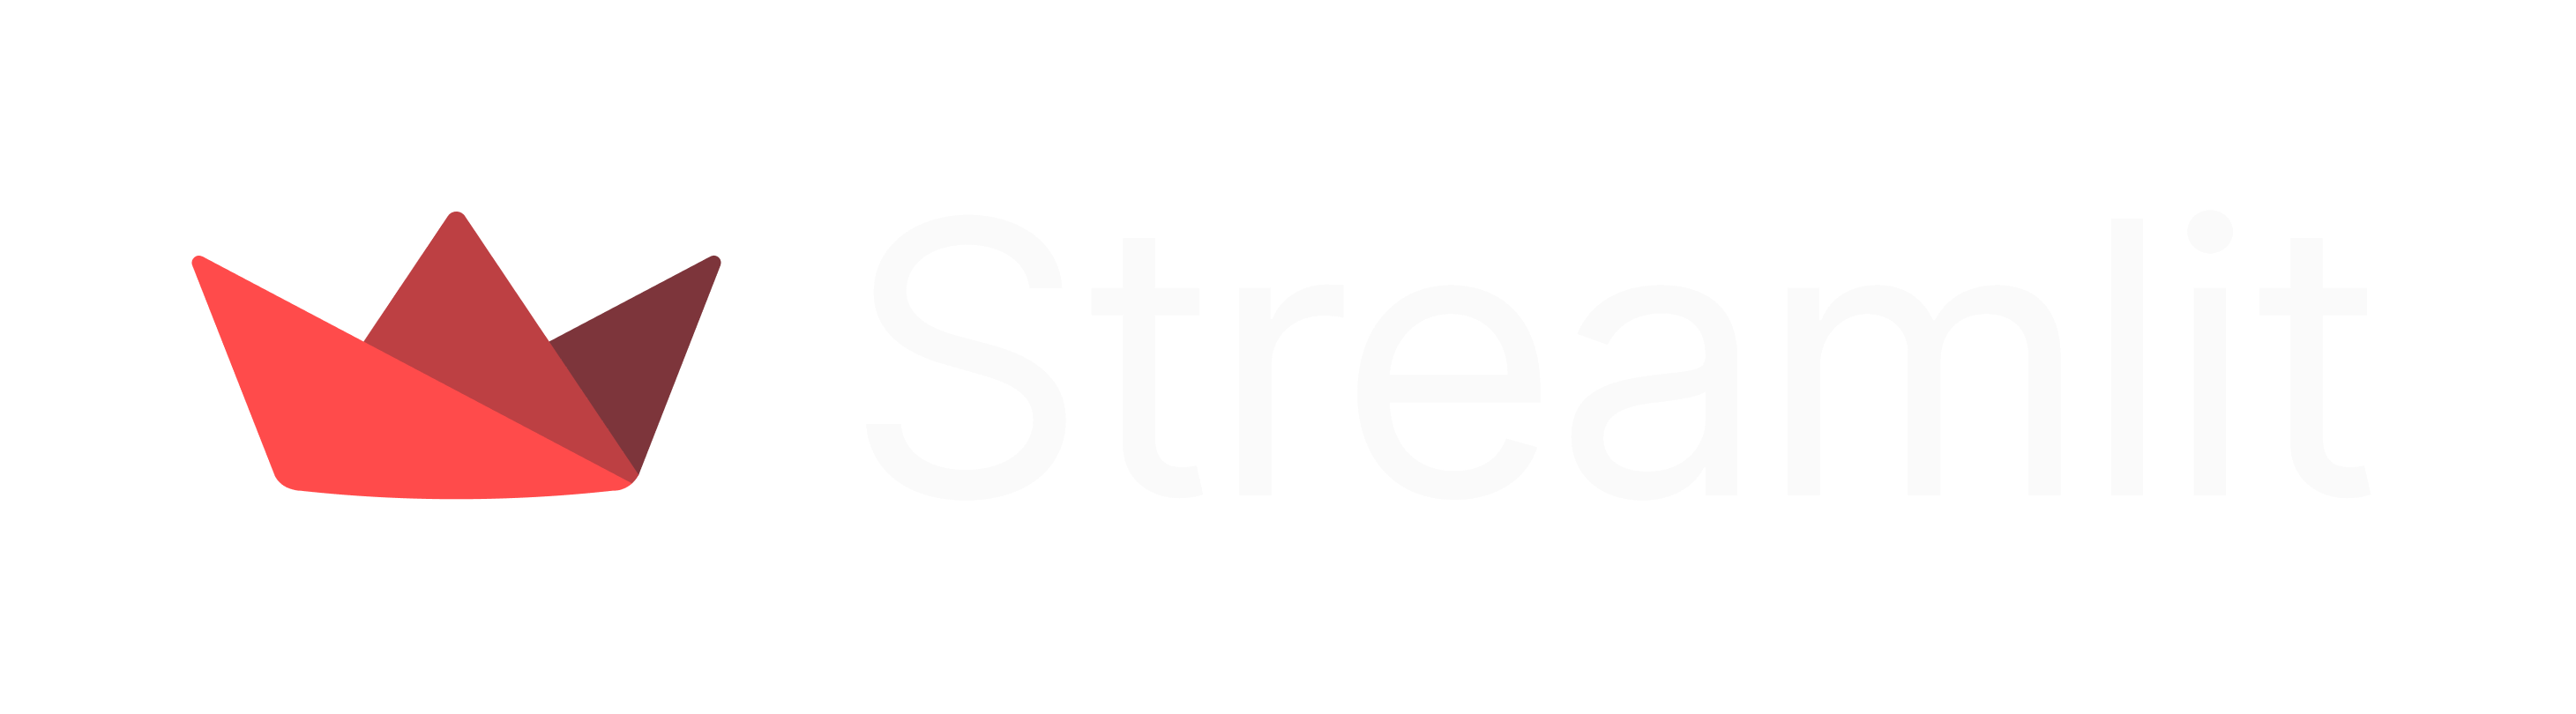

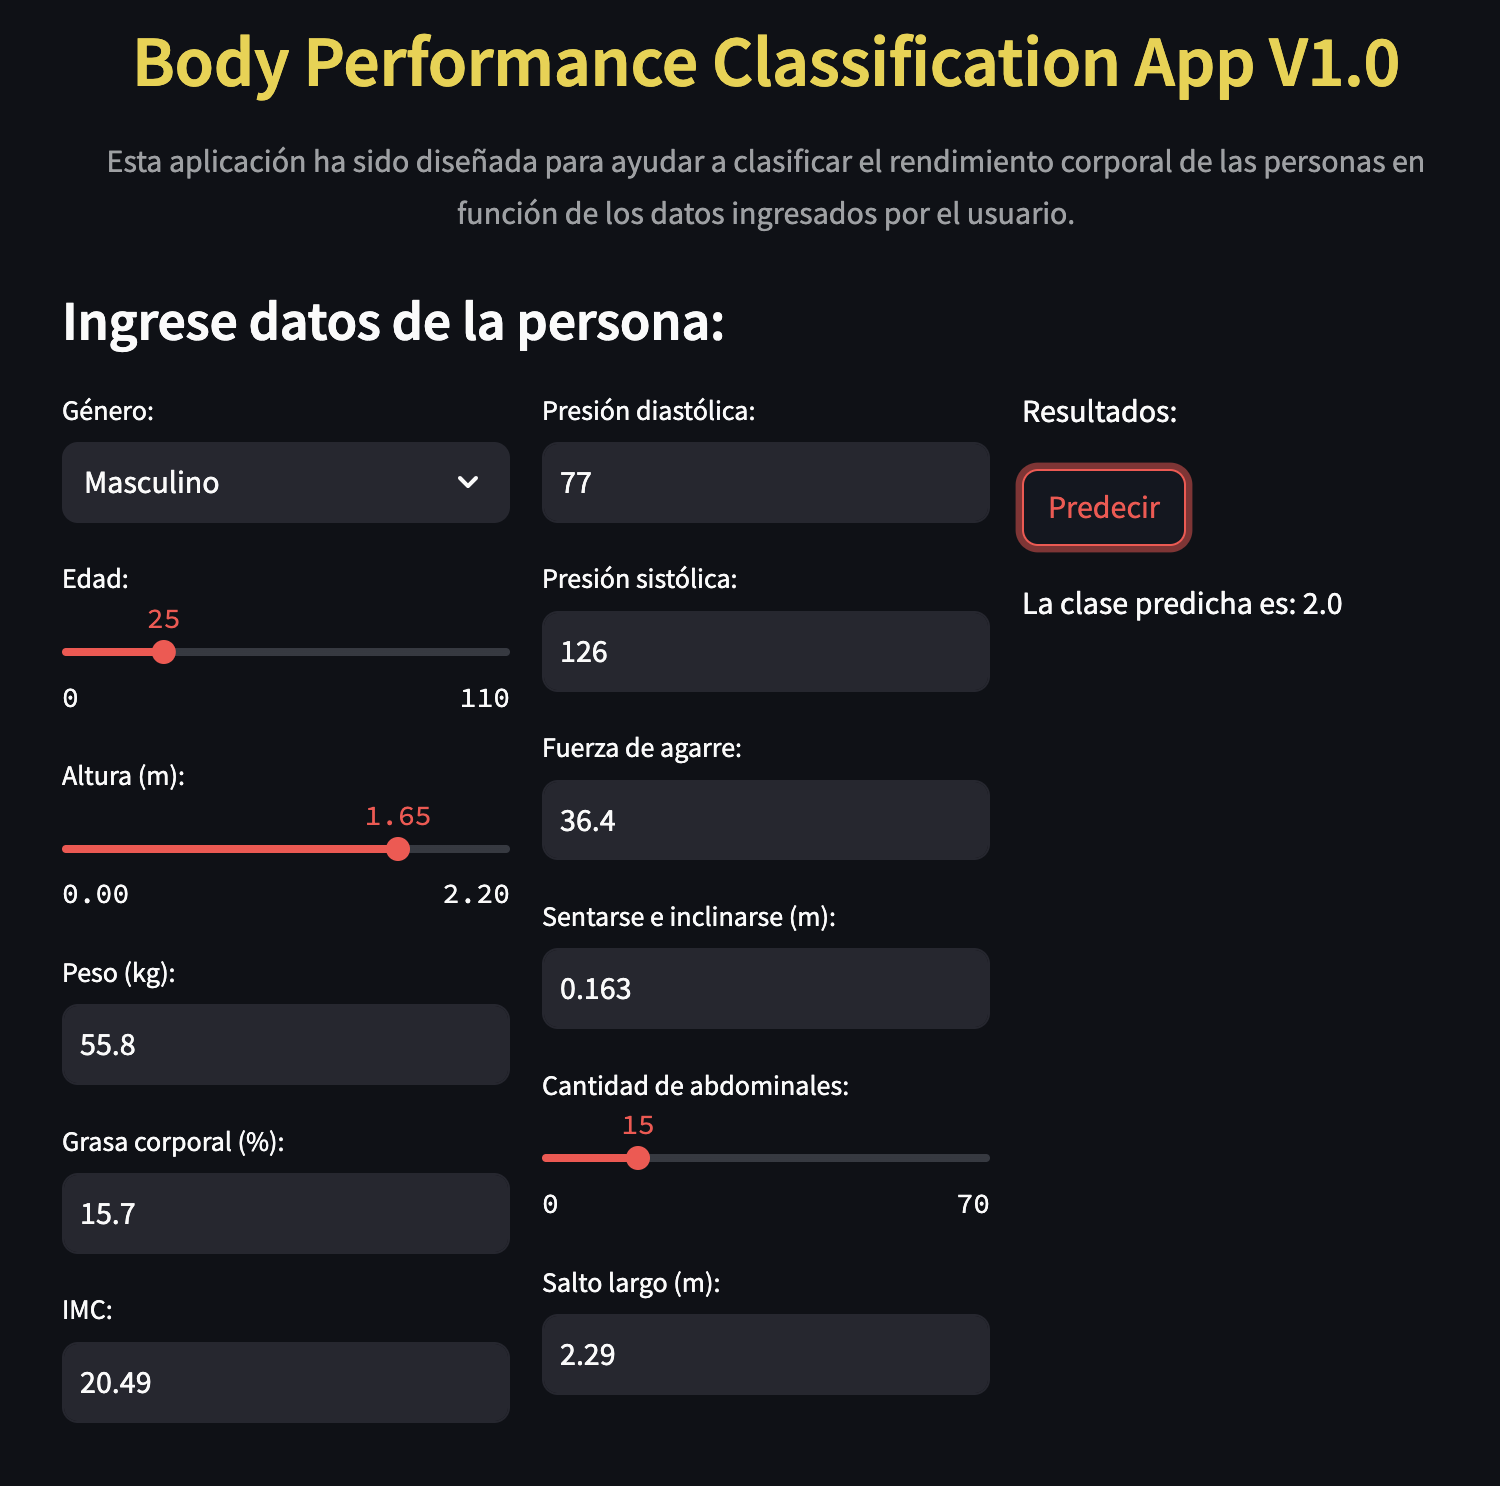

In [29]:
img_logo = 'img/streamlit.png'
img_mvp = 'img/mvp.png'

display(Image(filename=img_logo))
display(Image(filename=img_mvp))